In [1]:
import networkx as nx
import os
import matplotlib.pyplot as plt
from networkx.algorithms.dominating import is_dominating_set
from networkx.algorithms.bipartite import is_bipartite
from networkx.algorithms.bipartite.matching import *
from networkx.algorithms.bipartite.covering import *

In [55]:
folder_path = "/Users/Loïc/Desktop/AlgoAvancé/Dominant/public_dataset/"
filename= "36_50_reg.graph"

16_10_paw.graph : 16 edges


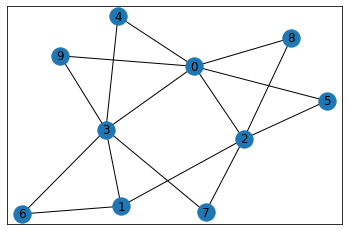

17_10_paw.graph : 16 edges


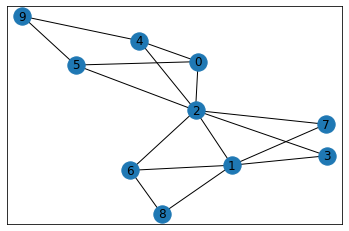

18_10_paw.graph : 16 edges


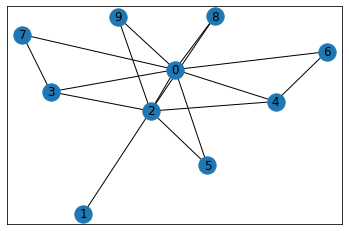

19_10_paw.graph : 16 edges


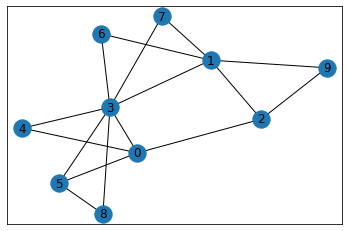

20_10_paw.graph : 16 edges


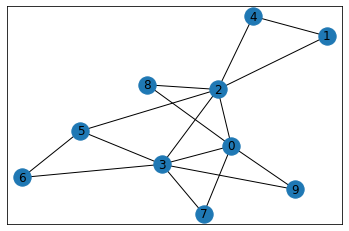

In [72]:
for filename in os.listdir(folder_path):
    if "10_paw" in filename :
        g = nx.read_adjlist(os.path.join(folder_path, filename))
        print("{} : {} edges".format(filename, g.number_of_edges()))
        nx.draw_networkx(g)
        plt.show()


In [52]:
def dominant(g):
    """
        A Faire:         
        - Ecrire une fonction qui retourne le dominant du graphe non dirigé g passé en parametre.
        - cette fonction doit retourner la liste des noeuds d'un petit dominant de g

        :param g: le graphe est donné dans le format networkx : https://networkx.github.io/documentation/stable/reference/classes/graph.html
    """
    all_nodes = set(g)
    neighbors_nb = {}
    for node in all_nodes :
        neighbors_nb[g.degree[node]] = node

    if len(neighbors_nb) == 1 and (g.number_of_nodes() == g.number_of_edges()) : # Cycle graph case

        return cycle_dominant(g)

    else : # greedy algorithm

        max_node = neighbors_nb[max(neighbors_nb.keys())]
        dominating_set = {max_node}
        all_nodes = all_nodes - set(g[max_node]) - {max_node}
        g = g.subgraph(all_nodes)

        while all_nodes :

            neighbors_nb = {}
            for node in all_nodes :
                neighbors_nb[g.degree[node]] = node

            if len(neighbors_nb) == 1 and (g.number_of_nodes() == g.number_of_edges()) : # Cycle graph case
                dominating_set |= cycle_dominant(g)
                return dominating_set

            max_node = neighbors_nb[max(neighbors_nb.keys())]
            dominating_set.add(max_node)
            all_nodes = all_nodes - set(g[max_node]) - {max_node}
            g = g.subgraph(all_nodes)

    return dominating_set

In [21]:
def cycle_dominant(g) :
    dominant_set = set()
    ordered_graph = order_cycle_graph(g)
    for i in range(0, len(ordered_graph), 3):
        dominant_set.add(ordered_graph[i])
    return dominant_set

In [17]:
def order_cycle_graph(g) :
    result = ["0"]
    result.append(list(g["0"])[0])
    while len(result) != g.order() :
        neighbours = list(g[result[-1]])
        neighbours.remove(result[-2])
        result.append(neighbours[0])
    return result

In [56]:
g = nx.read_adjlist(os.path.join(folder_path, filename))

In [31]:
order_cycle_graph(g)

['0',
 '44',
 '5',
 '12',
 '28',
 '46',
 '32',
 '17',
 '41',
 '25',
 '31',
 '9',
 '15',
 '26',
 '19',
 '20',
 '40',
 '35',
 '21',
 '2',
 '30',
 '42',
 '22',
 '14',
 '29',
 '23',
 '37',
 '13',
 '39',
 '11',
 '38',
 '3',
 '45',
 '34',
 '1',
 '4',
 '18',
 '49',
 '6',
 '8',
 '27',
 '24',
 '10',
 '48',
 '16',
 '43',
 '47',
 '36',
 '7',
 '33']

In [32]:
cycle_dominant(g)

{'0',
 '10',
 '12',
 '13',
 '15',
 '18',
 '20',
 '21',
 '25',
 '29',
 '32',
 '34',
 '38',
 '42',
 '43',
 '7',
 '8'}

In [ ]:
print(dominant(g))

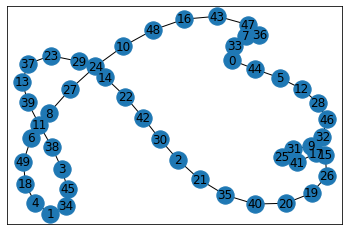

In [57]:
nx.draw_networkx(g)
plt.show()

In [62]:
h = g.subgraph(["0","44","5","12","28","46"])

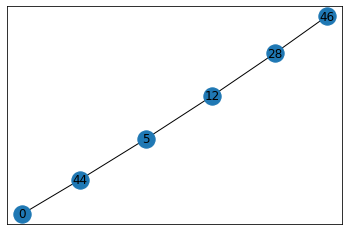

In [63]:
nx.draw_networkx(h)
plt.show()

In [40]:
a = [i for i in range(0,9)]
a

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [42]:
for i in range(0, len(a),3) :
    print(i)

0
3
6


In [44]:
a = set(["1", "2", "3"])
a

{'1', '2', '3'}

In [50]:
b = set(["4", "5", "6"])
b

{'4', '5', '6'}

In [51]:
a |= b
a

{'1', '2', '3', '4', '5', '6'}